<h2> Distribution of a Stopping Time for a Random Walk </h2>

We'll now compute the distribution of the random variable
$$
X := \inf\{t:s_t<0\}
$$
where $s_t$ is the random walk from the previous example and where $\inf$ denotes the infimum, which can intuitively be thought of as the minimum.  Hence $X$ gives the first time that the random walk becomes negative, which is an example of a particular class of random variables referred to as <i> stopping times</i>.

Accordingly, $X$ is a discrete random variable which can take values $1,2,3,...$ with positive probability.  Our aim now is to get an estimate of these probabilities.

We begin by repeating the simulation exercise from the second part of the previous example.

In [15]:
using Distributions
using PyPlot

p = 0.5;
d = Bernoulli(p);
T = 100;

N = 100000;
BernDraws = rand(d,T,N)

WalkSteps = (BernDraws.>=1) + -1*(BernDraws.<=0);
WalkSteps[1,:] = zeros(N);

st = cumsum(WalkSteps,dims=1);

We now want to find the first index in each column of $s_t$ at which a -1 is encountered.  Luckily Julia provides a function to do this, findfirst().  Once again, the arguments this function takes require some explanation.

1. The second argument of findfirst() is simply a vector we want to search through.  

2. The first argument is itself a function, which should return 1 when the condition you want to find the first incident of is satisfied.  For example, we are interested in the condition that a number is equal to 1.  A mathematical function which checks this condition is the following:
$$
f(x) = \begin{cases}
1 & \text{if } x=-1\\
0 & \text{else}
\end{cases}
$$
We can represent this function in Julia a couple of different ways: we can use the keywords "function" and "return", or for a function this simple we can define it "in-line" with the $\to$ operator.

In [16]:
function f(x)
    return x==-1
end

println(f(0))
println(f(-1))

g = x->x==-1

println(g(0))
println(g(-1))

false
true
false
true


To search through $s_t$ columnwise, we can use Julia's shorthand syntax to iterate over a collection.  A for loop would also work.

In [17]:
FirstNegative = [findfirst(u->u==-1,st[:,iSim]) for iSim=1:N]

100000-element Array{Union{Nothing, Int64},1}:
  2
 10
  4
  2
 68
  2
 10
  2
  2
  2
  4
 32
  2
  ⋮
 34
  2
  2
  4
  2
  2
 18
  2
  4
  2
  2
  2

It's possible that some of the simulations never actually hit -1.  In such case, findfirst() records a value of "nothing" in FirstNegative.  These are outcomes for which the value of $X$ is greater than the horizon $T$.  Hence we'll keep them in our total number of simulations, however they will not otherwise inform us about the distribution for the range in which we're computing it.

Next, we count the number of simulations for which the value of $X$ is equal to $t$ for each $t=2,3,...,T$, and divide by the total number of simulations $N$.

In [23]:
probs = [sum(FirstNegative.==t) for t=2:T]./convert(Float64,N)

99-element Array{Float64,1}:
 0.4988 
 0.0    
 0.12503
 0.0    
 0.06245
 0.0    
 0.03918
 0.0    
 0.02786
 0.0    
 0.02077
 0.0    
 0.01601
 ⋮      
 0.0    
 0.001  
 0.0    
 0.0011 
 0.0    
 0.00094
 0.0    
 0.00077
 0.0    
 0.00093
 0.0    
 0.0008 

We can now plot the PDF of $X$.

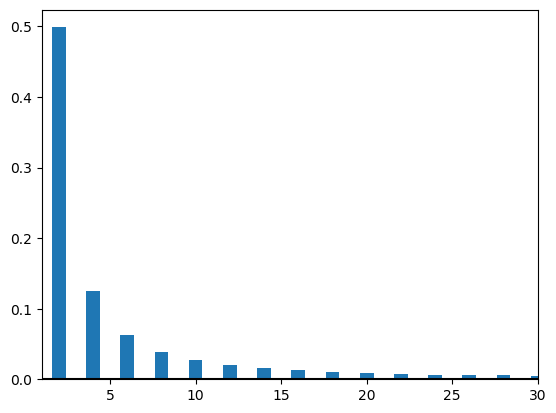

In [36]:
plot(0:1:101,zeros(length(0:1:101)),color="k")
PyPlot.plt.bar(2:1:T,probs);
xlim([1;30]);

We see that $X$ never takes an odd value, has a 50% probability of being 2 (since the first coin flip is fair), and otherwise decays thereafter.  To compute this distribution precisely, we could argue as follows:

1. As noted, the random walk has a 50% chance of starting with a negative step, so $f_X(2)=0.5$.
2. If the walk starts with a positive step, its value at $t=3$ will be either 0 or 2, so $f_X(3) = 0$.
3. If its value at $t=3$ is 2, then it's value at $t=4$ will be 1 or 3.  If its value at $t=3$ is 0, its value at $t=4$ will be either 1 or -1.
4. And so on.

As of each step, the total number of outcomes is $1/2^{t-1}$, giving $f_X(4) = 0.125$, $f_X(5)=0$, $f_X(6) = 0.0625$, etc.  

I haven't tried to see if I can derive a closed form expression for the probabilities at each step, but even if this is not possible the above algorithm could be modified to compute them exactly.